<a href="https://colab.research.google.com/github/MohanVishe/Supervised-ML--Classification----Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'>Mobile Price Range Prediction</font>

### <font color='red'> Problem Statement </font>

The smartphones market is a highly competitive market where Most of companies keep launching new models with small technology changes such as battery power, camera configuration, and processor.So we have to understand how the features of mobile phone affect the price range. 

### <font color='red'> Business Context </font>

In the competitive mobile phone market, companies want to understand mobile phone sales data and the factors driving the prices. The objective is to find out some relation between the features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

### <font color='red'> Dataset Description </font>

* **Battery_power** - Battery capacity in mAh
* **Blue** - Has bluetooth or not
* **Clock_speed** - speed at which microprocessor executes instructions
* **Dual_sim** - Has dual sim support or not
* **Fc** - Front Camera mega pixels
* **Four_g** - Has 4G or not
* **Int_memory** - Internal Memory capacity in  Gigabytes
* **M_dep** - Mobile Depth in cm
* **Mobile_wt** - Weight of mobile phone
* **N_cores** - Number of cores of processor
* **Pc** - Primary Camera mega pixels
* **Px_height** - Pixel Resolution Height
* **Px_width** - Pixel Resolution Width
* **Ram** - Random Access Memory in Mega
* **Touch_screen** - Has touch screen or not
* **Wifi** - wifi is present or not
* **Sc_h** - Screen Height in cm
* **Sc_w** - Screen Width in cm
* **Talk_time** - longest time that a single battery charge will last when you are
* **Three_g** - 3G is present or not
* **Wifi** -  wifi is present or not
* **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost),3(very high cost)


### Import and installing models

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Loading Dataset

In [ ]:
# importing csv files as dataframe
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#)

df=pd.read_csv("/content/drive/MyDrive/Projects/ Supervised ML Classification (Mobile Price Range Prediction)  )/data_mobile_price_range.csv")

### Data Inspection

In [ ]:
df.shape

(2000, 21)

In [ ]:
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [ ]:
df.tail(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


#### Checking Null or Missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# checking all values including categorical data
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#)

df.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# Checking number of unique values for each feature
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html)

df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [20]:
# value_counts() : number of values for each category of the features
# (https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

for i in df.columns:
  if len(df[i].value_counts()) >10:
    continue
  print(i)
  print(df[i].unique())
  print("-"*50)

blue
[0 1]
--------------------------------------------------
dual_sim
[0 1]
--------------------------------------------------
four_g
[0 1]
--------------------------------------------------
m_dep
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
--------------------------------------------------
n_cores
[2 3 5 6 1 8 4 7]
--------------------------------------------------
three_g
[0 1]
--------------------------------------------------
touch_screen
[0 1]
--------------------------------------------------
wifi
[1 0]
--------------------------------------------------
price_range
[1 2 3 0]
--------------------------------------------------


### <font color='orange'>Insights</font>

* This is small dataset with total 2000 rows and 21 columns 
* The `price_range` feature is dependent where othere 20 features are independent
* The dataset dont have any missing values.
* The various features are binary such as `blue`,`dual_sim`,`four_g`,`three_g`,`touch_screen`,`wifi`, etc
* The columns with numerical data are `battery_power, clock_speed, fc,int_memory ,m_depth ,mobile_wt ,n_cores ,pc ,px_height ,px_width ,ram ,sc_h ,sc_w ,talk_time, n_cores`

### Checking Duplicate Values

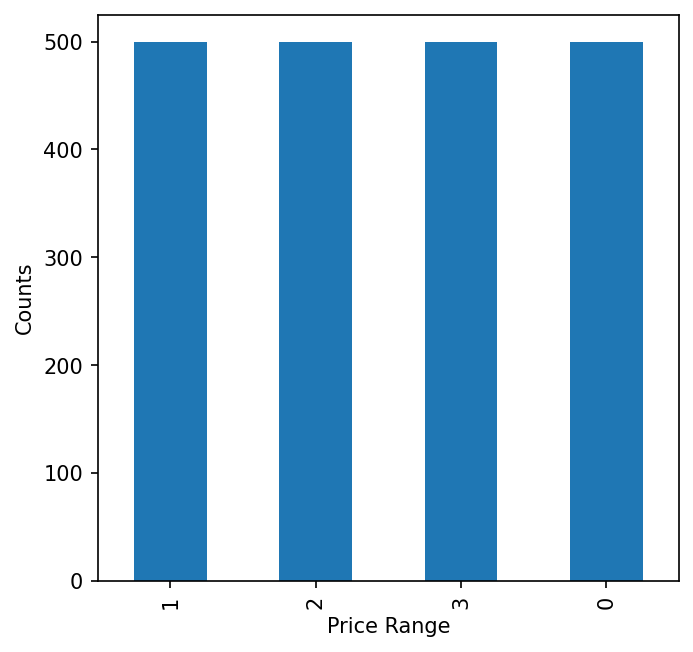

In [ ]:
plt.rcParams.update({'figure.figsize':(5,5),'figure.dpi':150})
df['price_range'].value_counts().plot(kind='bar')
plt.xlabel("Price Range")
plt.ylabel("Counts")
plt.show()